In [1]:
import pickle

/home/rain/Documents/GRIS/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with open("../data/psychotic_posts.pickle", "rb") as p:
    psychotic_posts = pickle.load(p)

In [4]:
len(list(psychotic_posts.items())[0][1])

25

In [5]:
psychosis_sample = list(psychotic_posts.items())[0][1][20]["text"].lower()

In [6]:
import os
import stanza
from stanza.server import CoreNLPClient

In [7]:
os.environ["CORENLP_HOME"] = "/home/rain/.stanfordnlp_resources/stanford-corenlp-4.1.0"

In [8]:
client = CoreNLPClient(timeout=150000000, be_quiet=True, annotators=['openie'], endpoint='http://localhost:1234')
client.start()
doc = client.annotate(psychosis_sample, output_format="json")
triples = []
for sentence in doc['sentences']:
    for triple in sentence['openie']:
        triples.append({
           'subject': triple['subject'],
           'relation': triple['relation'],
            'object': triple['object']
        })
client.stop()

2022-07-30 19:22:07 INFO: Writing properties to tmp file: corenlp_server-07cfdc2275824f48.props
2022-07-30 19:22:07 INFO: Starting server with command: java -Xmx5G -cp /home/rain/.stanfordnlp_resources/stanford-corenlp-4.1.0/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 1234 -timeout 150000000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-07cfdc2275824f48.props -annotators openie -preload -outputFormat serialized


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
g = nx.DiGraph()
for triplet in triples:
    g.add_edge(triplet["subject"], triplet["object"], relation=triplet["relation"])

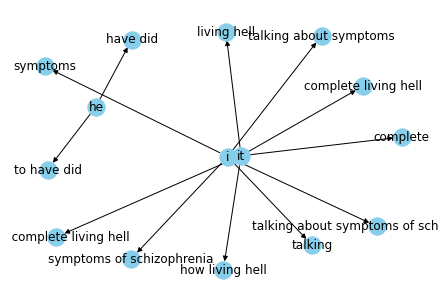

In [11]:
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues)

In [12]:
g.nodes

NodeView(('i', 'talking', 'it', 'complete', 'symptoms of schizophrenia', 'complete living hell', 'talking about symptoms', 'talking about symptoms of schizophrenia', 'how living hell', 'living hell', 'symptoms', 'how complete living hell', 'he', 'to have did', 'have did'))

In [13]:
g.edges

OutEdgeView([('i', 'talking'), ('i', 'symptoms of schizophrenia'), ('i', 'talking about symptoms'), ('i', 'talking about symptoms of schizophrenia'), ('i', 'symptoms'), ('it', 'complete'), ('it', 'complete living hell'), ('it', 'how living hell'), ('it', 'living hell'), ('it', 'how complete living hell'), ('he', 'to have did'), ('he', 'have did')])

In [14]:
for relation in g.edges.data("relation"):
    print(relation)

('i', 'talking', 'start')
('i', 'symptoms of schizophrenia', 'talking about')
('i', 'talking about symptoms', 'start')
('i', 'talking about symptoms of schizophrenia', 'start')
('i', 'symptoms', 'talking about')
('it', 'complete', 'has')
('it', 'complete living hell', 'has')
('it', 'how living hell', 'has')
('it', 'living hell', 'has')
('it', 'how complete living hell', 'has')
('he', 'to have did', 'turns out')
('he', 'have did', 'suddenly turns out')


In [16]:
nx.node_connectivity(g)

0

In [17]:
nx.number_connected_components(g.to_undirected())

3

In [18]:
nx.number_strongly_connected_components(g)

15

In [19]:
nx.number_weakly_connected_components(g)

3

In [20]:
degree_centrality = nx.degree_centrality(g)
for k, v in degree_centrality.items():
    print(f"{k}: {v}")

i: 0.3571428571428571
talking: 0.07142857142857142
it: 0.3571428571428571
complete: 0.07142857142857142
symptoms of schizophrenia: 0.07142857142857142
complete living hell: 0.07142857142857142
talking about symptoms: 0.07142857142857142
talking about symptoms of schizophrenia: 0.07142857142857142
how living hell: 0.07142857142857142
living hell: 0.07142857142857142
symptoms: 0.07142857142857142
how complete living hell: 0.07142857142857142
he: 0.14285714285714285
to have did: 0.07142857142857142
have did: 0.07142857142857142


In [21]:
avg_degree_centrality = sum(list(degree_centrality.values())) / len(list(degree_centrality.values()))
print(f"Average degree centrality: {avg_degree_centrality}")

Average degree centrality: 0.11428571428571425


In [22]:
in_degree_centrality = nx.in_degree_centrality(g)
for k, v in in_degree_centrality.items():
    print(f"{k}: {v}")

i: 0.0
talking: 0.07142857142857142
it: 0.0
complete: 0.07142857142857142
symptoms of schizophrenia: 0.07142857142857142
complete living hell: 0.07142857142857142
talking about symptoms: 0.07142857142857142
talking about symptoms of schizophrenia: 0.07142857142857142
how living hell: 0.07142857142857142
living hell: 0.07142857142857142
symptoms: 0.07142857142857142
how complete living hell: 0.07142857142857142
he: 0.0
to have did: 0.07142857142857142
have did: 0.07142857142857142


In [23]:
avg_in_degree_centrality = sum(list(in_degree_centrality.values())) / len(list(in_degree_centrality.values()))
print(f"Average in degree centrality: {avg_in_degree_centrality}")

Average in degree centrality: 0.05714285714285713


In [24]:
out_degree_centrality = nx.out_degree_centrality(g)
for k, v in out_degree_centrality.items():
    print(f"{k}: {v}")

i: 0.3571428571428571
talking: 0.0
it: 0.3571428571428571
complete: 0.0
symptoms of schizophrenia: 0.0
complete living hell: 0.0
talking about symptoms: 0.0
talking about symptoms of schizophrenia: 0.0
how living hell: 0.0
living hell: 0.0
symptoms: 0.0
how complete living hell: 0.0
he: 0.14285714285714285
to have did: 0.0
have did: 0.0


In [25]:
avg_out_degree_centrality = sum(list(out_degree_centrality.values())) / len(list(out_degree_centrality.values()))
print(f"Average out degree centrality: {avg_out_degree_centrality}")

Average out degree centrality: 0.057142857142857134


In [26]:
eigen = nx.eigenvector_centrality(g, max_iter=2000)
for k, v in eigen.items():
    print(f"{k}: {v}")

i: 0.0011928699109242007
talking: 0.28867451844365694
it: 0.0011928699109242007
complete: 0.28867451844365694
symptoms of schizophrenia: 0.28867451844365694
complete living hell: 0.28867451844365694
talking about symptoms: 0.28867451844365694
talking about symptoms of schizophrenia: 0.28867451844365694
how living hell: 0.28867451844365694
living hell: 0.28867451844365694
symptoms: 0.28867451844365694
how complete living hell: 0.28867451844365694
he: 0.0011928699109242007
to have did: 0.28867451844365694
have did: 0.28867451844365694


In [27]:
avg_eigen = sum(list(eigen.values())) / len(list(eigen.values()))
print(f"Average eigenvector centrality: {avg_eigen}")

Average eigenvector centrality: 0.23117818873711035


In [28]:
closeness_centrality = nx.closeness_centrality(g)
for k, v in closeness_centrality.items():
    print(f"{k}: {v}")

i: 0.0
talking: 0.07142857142857142
it: 0.0
complete: 0.07142857142857142
symptoms of schizophrenia: 0.07142857142857142
complete living hell: 0.07142857142857142
talking about symptoms: 0.07142857142857142
talking about symptoms of schizophrenia: 0.07142857142857142
how living hell: 0.07142857142857142
living hell: 0.07142857142857142
symptoms: 0.07142857142857142
how complete living hell: 0.07142857142857142
he: 0.0
to have did: 0.07142857142857142
have did: 0.07142857142857142


In [29]:
avg_closeness_centrality = sum(list(closeness_centrality.values())) / len(list(closeness_centrality.values()))
print(f"Average closeness centrality: {avg_closeness_centrality}")

Average closeness centrality: 0.05714285714285713
